In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os


In [3]:
# Directory where CSVs are located
csv_folder = "/Users/royschenk/Desktop/mappie/Thesis Folder/vqa"

csv_files = glob.glob(os.path.join(csv_folder, "VQA - *.csv"))

for file in csv_files:
    df = pd.read_csv(file)
    print(f"\n{os.path.basename(file)}")
    print(df.columns)
    print(df.head(2))




VQA - 5_0.66_h2.csv
Index(['Step', 'Energy (Hartree)', 'Bond_length', 'num_qubits', 'Final_energy',
       'exec_secs'],
      dtype='object')
   Step  Energy (Hartree)  Bond_length  num_qubits  Final_energy  exec_secs
0     0         -0.182876         0.66         7.0     -1.098719      2.939
1     1         -0.460430          NaN         NaN           NaN        NaN

VQA - 3_0.58.csv
Index(['Step', 'Energy (Hartree)', 'Bond_length', 'num_qubits', 'Final_energy',
       'exec_secs'],
      dtype='object')
   Step  Energy (Hartree)  Bond_length  num_qubits  Final_energy  exec_secs
0     0         -0.073740         0.58         7.0     -1.171362     3.5376
1     1         -0.278116          NaN         NaN           NaN        NaN

VQA - 4_0.62_h2.csv
Index(['Step', 'Energy (Hartree)', 'Bond_length', 'num_qubits', 'Final_energy',
       'exec_secs'],
      dtype='object')
   Step  Energy (Hartree)  Bond_length  num_qubits  Final_energy  exec_secs
0     0         -0.013930         0.62 

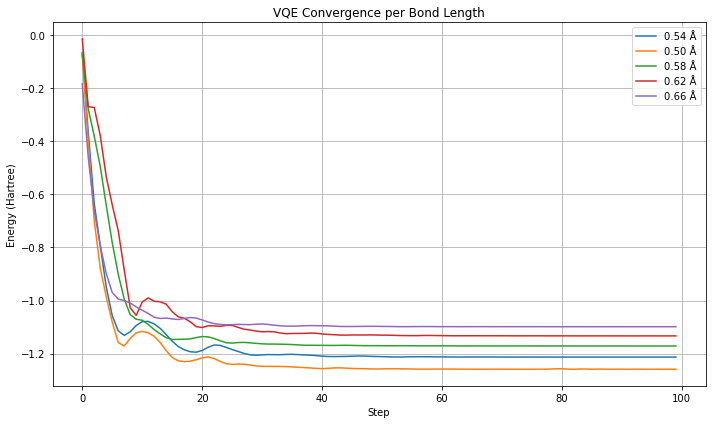

In [11]:
plt.figure(figsize=(10, 6))

for file in sorted(csv_files):
    df = pd.read_csv(file)
    
    # Clean the DataFrame by forward filling metadata columns
    df[['Bond_length', 'num_qubits', 'Final_energy', 'exec_secs']] = df[['Bond_length', 'num_qubits', 'Final_energy', 'exec_secs']].ffill()
    
    bond_length = df['Bond_length'].iloc[0]
    label = f"{bond_length:.2f} Å" if pd.notna(bond_length) else os.path.basename(file)
    
    plt.plot(df['Step'], df['Energy (Hartree)'], label=label)

plt.xlabel("Step")
plt.ylabel("Energy (Hartree)")
plt.title("VQE Convergence per Bond Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


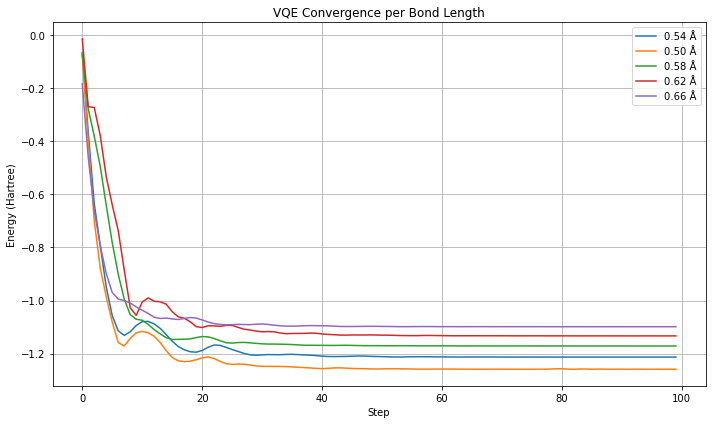

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for file in sorted(csv_files):
    df = pd.read_csv(file)
    
    # Clean the DataFrame by forward filling metadata columns
    df[['Bond_length', 'num_qubits', 'Final_energy', 'exec_secs']] = df[['Bond_length', 'num_qubits', 'Final_energy', 'exec_secs']].ffill()
    
    bond_length = df['Bond_length'].iloc[0]
    label = f"{bond_length:.2f} Å" if pd.notna(bond_length) else os.path.basename(file)
    
    plt.plot(df['Step'], df['Energy (Hartree)'], label=label)

plt.xlabel("Step")
plt.ylabel("Energy (Hartree)")
plt.title("VQE Convergence per Bond Length")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("vqe_convergence_plot.png", dpi=300)

# Show the plot
plt.show()


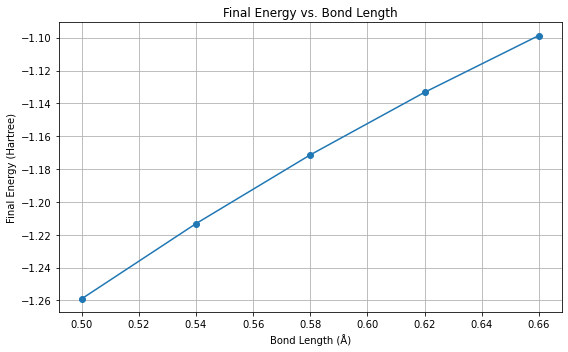

In [12]:
final_energies = []

for file in sorted(csv_files):
    df = pd.read_csv(file)
    df[['Bond_length', 'Final_energy']] = df[['Bond_length', 'Final_energy']].ffill()
    
    bond_length = df['Bond_length'].iloc[0]
    final_energy = df['Final_energy'].iloc[0]
    
    if pd.notna(bond_length) and pd.notna(final_energy):
        final_energies.append((bond_length, final_energy))

# Sort by bond length for smooth plotting
final_energies.sort()
bond_lengths, energies = zip(*final_energies)

plt.figure(figsize=(8, 5))
plt.plot(bond_lengths, energies, marker='o')
plt.xlabel("Bond Length (Å)")
plt.ylabel("Final Energy (Hartree)")
plt.title("Final Energy vs. Bond Length")
plt.grid(True)
plt.tight_layout()
plt.show()


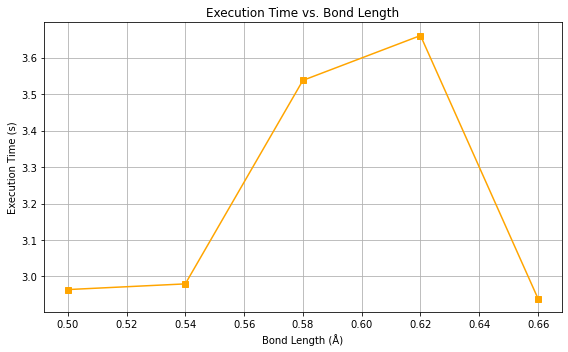

In [13]:
exec_times = []

for file in sorted(csv_files):
    df = pd.read_csv(file)
    df[['Bond_length', 'exec_secs']] = df[['Bond_length', 'exec_secs']].ffill()
    
    bond_length = df['Bond_length'].iloc[0]
    exec_sec = df['exec_secs'].iloc[0]
    
    if pd.notna(bond_length) and pd.notna(exec_sec):
        exec_times.append((bond_length, exec_sec))

# Sort by bond length
exec_times.sort()
bond_lengths_exec, times = zip(*exec_times)

plt.figure(figsize=(8, 5))
plt.plot(bond_lengths_exec, times, marker='s', color='orange')
plt.xlabel("Bond Length (Å)")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs. Bond Length")
plt.grid(True)
plt.tight_layout()
plt.show()
